In [1]:
import veloxchem as vlx
import py3Dmol as p3d
from matplotlib import pyplot as plt
import numpy as np
import ipywidgets
import h5py

In [2]:
def read_xyz_file(file_name):
    """Reads all the configurations from an xyz geometry optimization file."""
    xyz_file = open(file_name, "r")
    data = xyz_file.read()
    xyz_file.close()
    
    xyz_file = open(file_name, "r")
    i = 0
    steps = []
    energies = []
    for line in xyz_file:
        if "Energy" in line:
            steps.append(i)
            i += 1
            parts = line.split()
            energy = float(parts[-1])
            energies.append(energy)
    xyz_file.close()
    
    return data, steps, energies

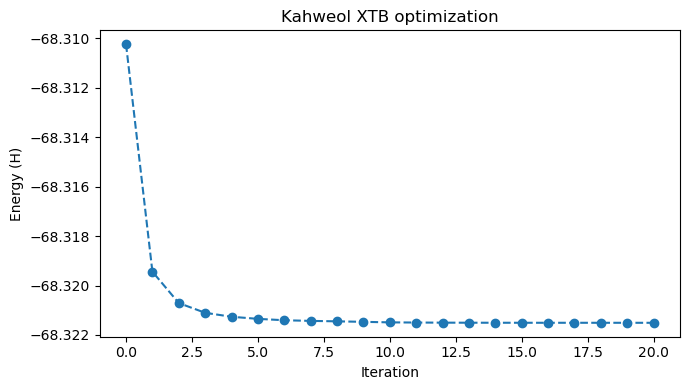

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [3]:
xyz_file_name = '../../data/md/kahweol_optim.xyz'
xyz_data, steps, energies = read_xyz_file(xyz_file_name)

# Plot the energies
plt.figure(figsize=(7,4))
plt.plot(steps, energies,'o--')
plt.xlabel('Iteration')
plt.ylabel('Energy (H)')
plt.title("Kahweol XTB optimization")
plt.tight_layout(); plt.show()

# and animate the optimization
viewer = p3d.view(width=600, height=300)
viewer.addModelsAsFrames(xyz_data)
viewer.animate({"loop": "forward"})

viewer.setViewStyle({"style": "outline", "width": 0.05})
viewer.setStyle({"stick": {}, "sphere": {"scale": 0.25}})

viewer.show()

In [4]:
def read_xyz_index(file_name, index=0):
    """Reads one configuration defined by its index from the xyz optimization file."""
    xyz_file = open(file_name, "r")
    current_index = 0
    data = ""

    # Read the number of atoms from the first line
    line = xyz_file.readline()
    natm = line.split()[0]
    data += line
    for line in xyz_file:
        if index == current_index:
            data += line
            if 'Energy' in line:
                parts = line.split()
                energy = float(parts[-1])
        if natm in line:
            parts = line.split()
            if len(parts) == 1:
                if index == current_index:
                    break
                current_index += 1
    xyz_file.close()
    return data, energy


def return_viewer(file_name, step=0):
    xyz_data_i, energy_i = read_xyz_index(file_name, step)
    
    # Uncomment if you would also like to see the energy plot
    # or comment out if you would like to skip this.
    plt.figure(figsize=(7,4))
    plt.plot(steps, energies, 'o--')
    plt.plot(step, energy_i, 'o', markersize=15)
    plt.xlabel('Iteration')
    plt.ylabel('Energy (H)')
    plt.title("Kahweol XTB optimization")
    plt.tight_layout(); plt.show()
    
    viewer = p3d.view(width=600, height=300)
    viewer.addModel(xyz_data_i)
    viewer.setViewStyle({"style": "outline", "width": 0.05})
    viewer.setStyle({"stick": {}, "sphere": {"scale": 0.25}})
    viewer.show()

In [5]:
total_steps = steps[-1] # number of configurations in the trajectory file

# Note that the slider only works in a Jupyter notebook.
ipywidgets.interact(return_viewer, file_name=xyz_file_name,
                    step=ipywidgets.IntSlider(min=0, max=total_steps, step=1, value=3))

interactive(children=(Text(value='../../data/md/kahweol_optim.xyz', description='file_name'), IntSlider(value=…

<function __main__.return_viewer(file_name, step=0)>

In [6]:
xtb_drv = vlx.XtbDriver()
xtb_vibanalysis_drv = vlx.VibrationalAnalysis(xtb_drv)

In [7]:
# read the last configuration from file
kahweol_xyz, opt_energy = read_xyz_index(file_name=xyz_file_name, index=total_steps)
# create the Mlecul object
xtb_opt_kahweol = vlx.Molecule.read_xyz_string(kahweol_xyz)
# perform vibrational analysis -- diagonalize Hessian, extract frequencies and normal modes
# and calculate IR intensities.
xtb_vibanalysis_drv.compute(xtb_opt_kahweol)

                                                                                                                          
                                               Vibrational Analysis Driver                                                


                                                                                                                          
                          The following will be computed:                                                                 
                                                                                                                          
                          - Vibrational frequencies and normal modes                                                      
                          - Force constants                                                                               
                          - IR intensities                                                                                
                                                                                                                          


                                                                                                                          
                                                    XTB Hessian Driver                                                    


                                                                                                                          
                          Hessian Type                    : Numerical                                                     
                          Numerical Method                : Symmetric Difference Quotient                                 
                          Finite Difference Step Size     : 0.001 a.u.                                                    
                                                                                                                          


                                   *** Time spent in Hessian calculation: 23.15 sec ***                                   
                                                                                                                          


                                                   Free Energy Analysis                                                   
                                                                                                                          
       Note: Rotational symmetry is set to 1 regardless of true symmetry                                                  
       No Imaginary Frequencies                                                                                           
                                                                                                                          
       Free energy contributions calculated at @ 298.15 K:                                                                
       Zero-point vibrational energy:                                  263.1952 kcal/mol                                  
       H   (Trans + Rot + Vib = Tot):   1.4812 +   0.8887 +  10.5627 =  12.9326 kcal/mol                                  
       S   (Tran

                                                   Vibrational Analysis                                                   
                                                                                                                          
* Info * The 5 dominant normal modes are printed below.                                                                   
                                                                                                                          
                                   Vibrational Mode      11                                                               
                                   ----------------------------------------------------                                   
                                   Harmonic frequency:                 209.80  cm**-1                                     
                                   Reduced mass:                       1.2477  amu                                        
                

{'molecule_xyz_string': '49\n\nO             -4.444356148300        -1.519231405700         0.133818803000\nO             -5.717728473400         0.942316237100        -0.066968962400\nO              5.074944380100         0.621839630700         0.095361864000\nC             -1.218663248700        -0.830595956300        -0.247223992800\nC             -0.477629871500         0.497184226800        -0.529673918500\nC             -2.930011813600         0.109407860600         1.091647841000\nC             -1.787420846300        -0.894913983900         1.174595923900\nC             -2.515711138500        -0.855946194500        -1.095040548800\nC              0.968464285400         0.594394878100         0.023051359100\nC             -3.654907965800        -0.372192923700        -0.180394141400\nC             -0.338906858500        -2.036979464400        -0.583399668300\nC             -1.380813476500         1.698304225800        -0.180085905800\nC             -2.322111192600         1.50700

In [8]:
# To animate the normal mode we will need both the geometry and the displacements 
def get_normal_mode(molecule, normal_mode):
    elements = molecule.get_labels()
    coords = molecule.get_coordinates_in_angstrom()
    natm = molecule.number_of_atoms()
    vib_xyz = "%d\n\n" % natm
    nm = normal_mode.reshape(natm, 3)
    for i in range(natm):
        # add coordinates:
        vib_xyz += elements[i] + " %15.7f %15.7f %15.7f " % (coords[i,0], coords[i,1], coords[i,2])
        # add displacements:
        vib_xyz += "%15.7f %15.7f %15.7f\n" % (nm[i,0], nm[i,1], nm[i,2])
    return vib_xyz

# Broadening function
def add_broadening(list_ex_energy, list_osci_strength, line_profile='Lorentzian', line_param=10, step=10):
        x_min = np.amin(list_ex_energy) - 50
        x_max = np.amax(list_ex_energy) + 50
        x = np.arange(x_min, x_max, step)
        y = np.zeros((len(x)))
        #print(x)
        #print(y)

        # go through the frames and calculate the spectrum for each frame
        for xp in range(len(x)):
            for e, f in zip(list_ex_energy, list_osci_strength):
                if line_profile == 'Gaussian':
                    y[xp] += f * np.exp(-(
                        (e - x[xp]) / line_param)**2)
                elif line_profile == 'Lorentzian':
                    y[xp] += 0.5 * line_param * f / (np.pi * (
                        (x[xp] - e)**2 + 0.25 * line_param**2))
        return x, y

In [9]:
wvn, ir = xtb_vibanalysis_drv.vib_frequencies, xtb_vibanalysis_drv.ir_intensities
wvng, irg = add_broadening(wvn, ir, line_profile='Gaussian', line_param=10, step=2)

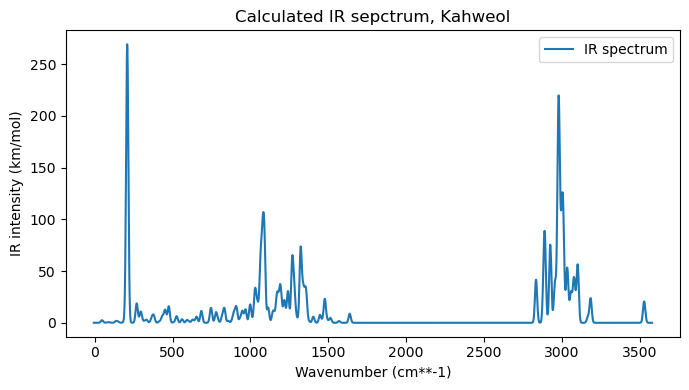




       Normal mode 64: 1078.75 cm-1, 68.61 km/mol.


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [10]:
# Plot the IR spectra
plt.figure(figsize=(7,4))

# Plot the IR spectrum
plt.plot(wvng, irg, label='IR spectrum')
plt.xlabel('Wavenumber (cm**-1)')
#plt.axis(xmin=3200, xmax=3500)
#plt.axis(ymin=-0.2, ymax=1.5)
plt.ylabel('IR intensity (km/mol)')
plt.title("Calculated IR sepctrum, Kahweol")
plt.legend()
plt.tight_layout(); plt.show()

# Visualize the vibrational mode
index = 64
print("\n\n\n       Normal mode %d: %.2f cm-1, %.2f km/mol." % (index, 
                                                                xtb_vibanalysis_drv.vib_frequencies[index-1],
                                                                xtb_vibanalysis_drv.ir_intensities[index-1]))
normal_mode = get_normal_mode(xtb_opt_kahweol, xtb_vibanalysis_drv.normal_modes[index-1])
view = p3d.view(viewergrid=(1,1), width=600, height=300)
view.addModel(normal_mode, "xyz", {'vibrate': {'frames':10,'amplitude':0.75}})

view.setViewStyle({"style": "outline", "width": 0.05})
view.setStyle({"stick": {}, "sphere": {"scale": 0.25}})

view.animate({'loop': 'backAndForth'})
view.zoomTo()
view.show()

In [11]:
def vibration_viewer(index):
    freq = xtb_vibanalysis_drv.vib_frequencies[index-1]
    ir_intens = xtb_vibanalysis_drv.ir_intensities[index-1]
    # Plot the IR spectrum
    plt.figure(figsize=(7,4))
    plt.plot(wvng, irg)
    plt.plot(freq, ir_intens, 'o',  markersize=10)
    plt.xlabel('Wavenumber (cm**-1)')
    plt.ylabel('IR intensity (km/mol)')
    plt.title("Calculated IR sepctrum, Kahweol")
    plt.tight_layout(); plt.show()
    
    normal_mode = get_normal_mode(xtb_opt_kahweol, xtb_vibanalysis_drv.normal_modes[index-1])
    view = p3d.view(viewergrid=(1,1), width=600, height=300)
    view.addModel(normal_mode, "xyz", {'vibrate': {'frames':10,'amplitude':0.75}})
    view.setViewStyle({"style": "outline", "width": 0.05})
    view.setStyle({"stick": {}, "sphere": {"scale": 0.25}})
    view.animate({'loop': 'backAndForth'})
    view.zoomTo()
    view.show()

In [12]:
no_norm_modes = xtb_vibanalysis_drv.vib_frequencies.shape[0] # number of vibrational modes

# Note that the slider only works in a Jupyter notebook.
ipywidgets.interact(vibration_viewer,
                    index=ipywidgets.IntSlider(min=1, max=no_norm_modes, step=1, value=92))

interactive(children=(IntSlider(value=92, description='index', max=141, min=1), Output()), _dom_classes=('widg…

<function __main__.vibration_viewer(index)>